In [1]:
import pandas as pd
import numpy as np
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#DATA_DIR = Path(is3_broker_rl.__file__).parent.parent / "data"

In [3]:
# Papermill parameter cell
# Name of the directory to analyse. Should contain consumption_action.csv and consumption_reward.csv.
ANALYSIS_DIR_NAME = ""

In [4]:
path = "../data/"
reward_prefix = "wholesale_reward.csv"

In [5]:
#ANALYSIS_DIR = DATA_DIR / ANALYSIS_DIR_NAME

### Reward analysis

In [6]:
df_reward = pd.read_csv(os.path.join(path+reward_prefix))


In [7]:
# Fixes the issue that the experiment scheduler always assigns the same gameId
def write_unique_game_id(df):
    new_game_start_indices = df[df["timeslot"] < df["timeslot"].shift()].index
    if len(new_game_start_indices) > 0:
        df.loc[: new_game_start_indices[0], "gameId"] = f"game0"
        for i in range(len(new_game_start_indices) - 1):
            df.loc[new_game_start_indices[i] : new_game_start_indices[i + 1], "gameId"] = f"game{i + 1}"
        df.loc[new_game_start_indices[-1] :, "gameId"] = f"game{len(new_game_start_indices)}"

In [8]:
def min_max_scaler(series):
    return (series - series.min()) / (series.max() - series.min())

In [9]:

df_reward.dropna(inplace=True) # Drop first few timesteps that have no action. 
df_reward2 = df_reward["observation"].apply(json.loads)
col_names = list(df_reward2.iloc[0].keys())
df_reward2 = df_reward2.apply(lambda x: list(x.values()))
temp_list = []
for row in df_reward2:

    temp_list.append(row)

temp_df = pd.DataFrame(temp_list, columns=col_names)

temp_merge_df = pd.DataFrame()
temp_name = []
for column in temp_df.columns:
    if type(temp_df[column].iloc[0]) == list:
        temp_df2 = temp_df[column].apply(pd.Series)
        i=0
        for column2 in temp_df2:
            temp_merge_df[f"{column}_{i}"] = temp_df2[column2]
            i+=1
            
        
    else:
        temp_merge_df[column] = temp_df[column]
    
col_names = []
price = []
energy = []
for i in range(24):
    col_names.append(f"energy_{i+1}")
    col_names.append(f"price_{i+1}")
    price.append(f"price_{i+1}")
    energy.append(f"energy_{i+1}")




/tmp/ipykernel_4183/1597897593.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_merge_df[f"{column}_{i}"] = temp_df2[column2]
/tmp/ipykernel_4183/1597897593.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_merge_df[f"{column}_{i}"] = temp_df2[column2]
/tmp/ipykernel_4183/1597897593.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a 

In [10]:
df_action = df_reward.apply(lambda x: x["last_action"].split(";"), result_type="expand", axis=1).drop(0, axis=1)
df_action = df_action.astype(float)
df_action.columns = col_names
action_observation_reward_df = pd.concat([df_action,temp_merge_df, df_reward[["reward", "balancing_reward", "wholesale_reward","shaped_return","sum_mWh"]]],axis=1)
write_unique_game_id(action_observation_reward_df)
df = action_observation_reward_df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10829 entries, 0 to 10828
Columns: 352 entries, energy_1 to sum_mWh
dtypes: float64(349), int64(2), object(1)
memory usage: 29.1+ MB


In [11]:
df[df["customer_count"].shift(1) -df["customer_count"] > 8000 | (df["customer_count"].shift(1) -df["customer_count"] < 8000)]["customer_count"]

17       54633
23       53493
29       52569
89       57393
107      55329
         ...  
10752    50545
10788    55309
10794    53551
10800    52621
10806    51748
Name: customer_count, Length: 772, dtype: int64

In [12]:
df.iloc[5300:8000][["customer_count","reward","balancing_reward", "wholesale_reward","shaped_return","customer_count"]].tail(50)

,customer_count,reward,balancing_reward,wholesale_reward,shaped_return,customer_count
7950,57496,-0.110444,-0.113317,0.002874,-1.189307,57496
7951,57496,-0.345298,-0.343032,-0.002266,-1.960651,57496
7952,57496,-0.355694,-0.355851,0.000157,-2.010379,57496
7953,57496,-0.127930,-0.132126,0.004196,-1.277175,57496
7954,57496,-0.375282,-0.374620,-0.000662,-2.078062,57496
7955,54685,-0.018873,-0.011925,-0.006948,-0.506197,54685
7956,54685,-0.152453,-0.152603,0.000151,-1.401893,54685
7957,54685,-0.181598,-0.167386,-0.014212,-1.451902,54685
7958,54685,-0.158305,-0.158412,0.000106,-1.402059,54685
7959,54685,-0.137780,-0.134944,-0.002836,-1.280860,54685


In [13]:
df[df["reward"]< -0.3 ]

,energy_1,price_1,energy_2,price_2,energy_3,price_3,energy_4,price_4,energy_5,price_5,...,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,reward,balancing_reward,wholesale_reward,shaped_return,sum_mWh
23,42.271483,-9.492537,-7.750756,89.370269,-27.448359,33.845216,-26.577869,64.442891,39.161408,-31.075191,...,0.0,0.0,0.0,0.0,0.0,-0.305741,-0.305924,0.000183,-1.836671,36.332900
151,-43.751851,3.826311,-32.825941,76.901007,24.361455,-57.532632,-47.337574,4.917938,40.934592,-38.094461,...,0.0,0.0,0.0,1.0,0.0,-0.387523,-0.373330,-0.014193,-2.059290,14.070969
165,36.296809,-39.694789,-39.710388,89.993691,-18.858781,70.343429,34.315026,-60.283065,-49.905795,89.690965,...,0.0,0.0,0.0,1.0,0.0,-0.301808,-0.294368,-0.007440,-1.823928,37.607166
166,18.565053,-76.052755,-34.459645,52.320421,15.346348,-91.992807,15.412545,-49.474725,31.987739,-99.596441,...,0.0,0.0,0.0,0.0,1.0,-0.309185,-0.299745,-0.009440,-1.845802,33.680676
262,-8.332855,2.271840,17.508167,-83.544618,40.701973,-2.772555,45.508260,-88.637400,40.047014,-94.771624,...,0.0,1.0,0.0,0.0,0.0,-0.305654,-0.295057,-0.010597,-1.813843,35.137399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10586,-42.935202,15.577608,13.474745,-23.702151,-5.276045,19.225836,-45.748085,79.269838,38.032079,-37.975758,...,0.0,0.0,0.0,1.0,0.0,-0.312718,-0.306432,-0.006286,-1.860650,25.848405
10626,23.414981,-15.198109,31.399649,-31.292540,21.363223,-9.004891,-1.682633,39.771193,7.992148,-30.672336,...,0.0,0.0,0.0,0.0,0.0,-0.304804,-0.291101,-0.013703,-1.788936,37.628161
10689,46.467495,-28.410292,-26.116171,13.979748,25.436205,-91.831368,40.031004,-24.938139,12.013209,-48.118657,...,1.0,0.0,0.0,0.0,0.0,-0.676456,-0.669598,-0.006858,-1.519207,48.494207
10711,24.472123,-96.589351,44.106561,-18.408766,47.503042,-56.112236,9.282279,-54.716820,9.383458,-93.945456,...,0.0,1.0,0.0,0.0,0.0,-0.305015,-0.293050,-0.011965,-0.812926,44.727917


In [14]:
df_reward_rolling = df_reward["reward"].rolling(20).mean().dropna()
df_balancing_reward = df_reward["balancing_reward"].rolling(5).mean().dropna()
df_wholesale_reward = df_reward["wholesale_reward"].rolling(5).mean().dropna()
df_tariff_reward = df_reward["tariff_reward"].rolling(1).mean().dropna()
#df_shaped = df_reward["shaped_return"].rolling(20).mean().dropna()

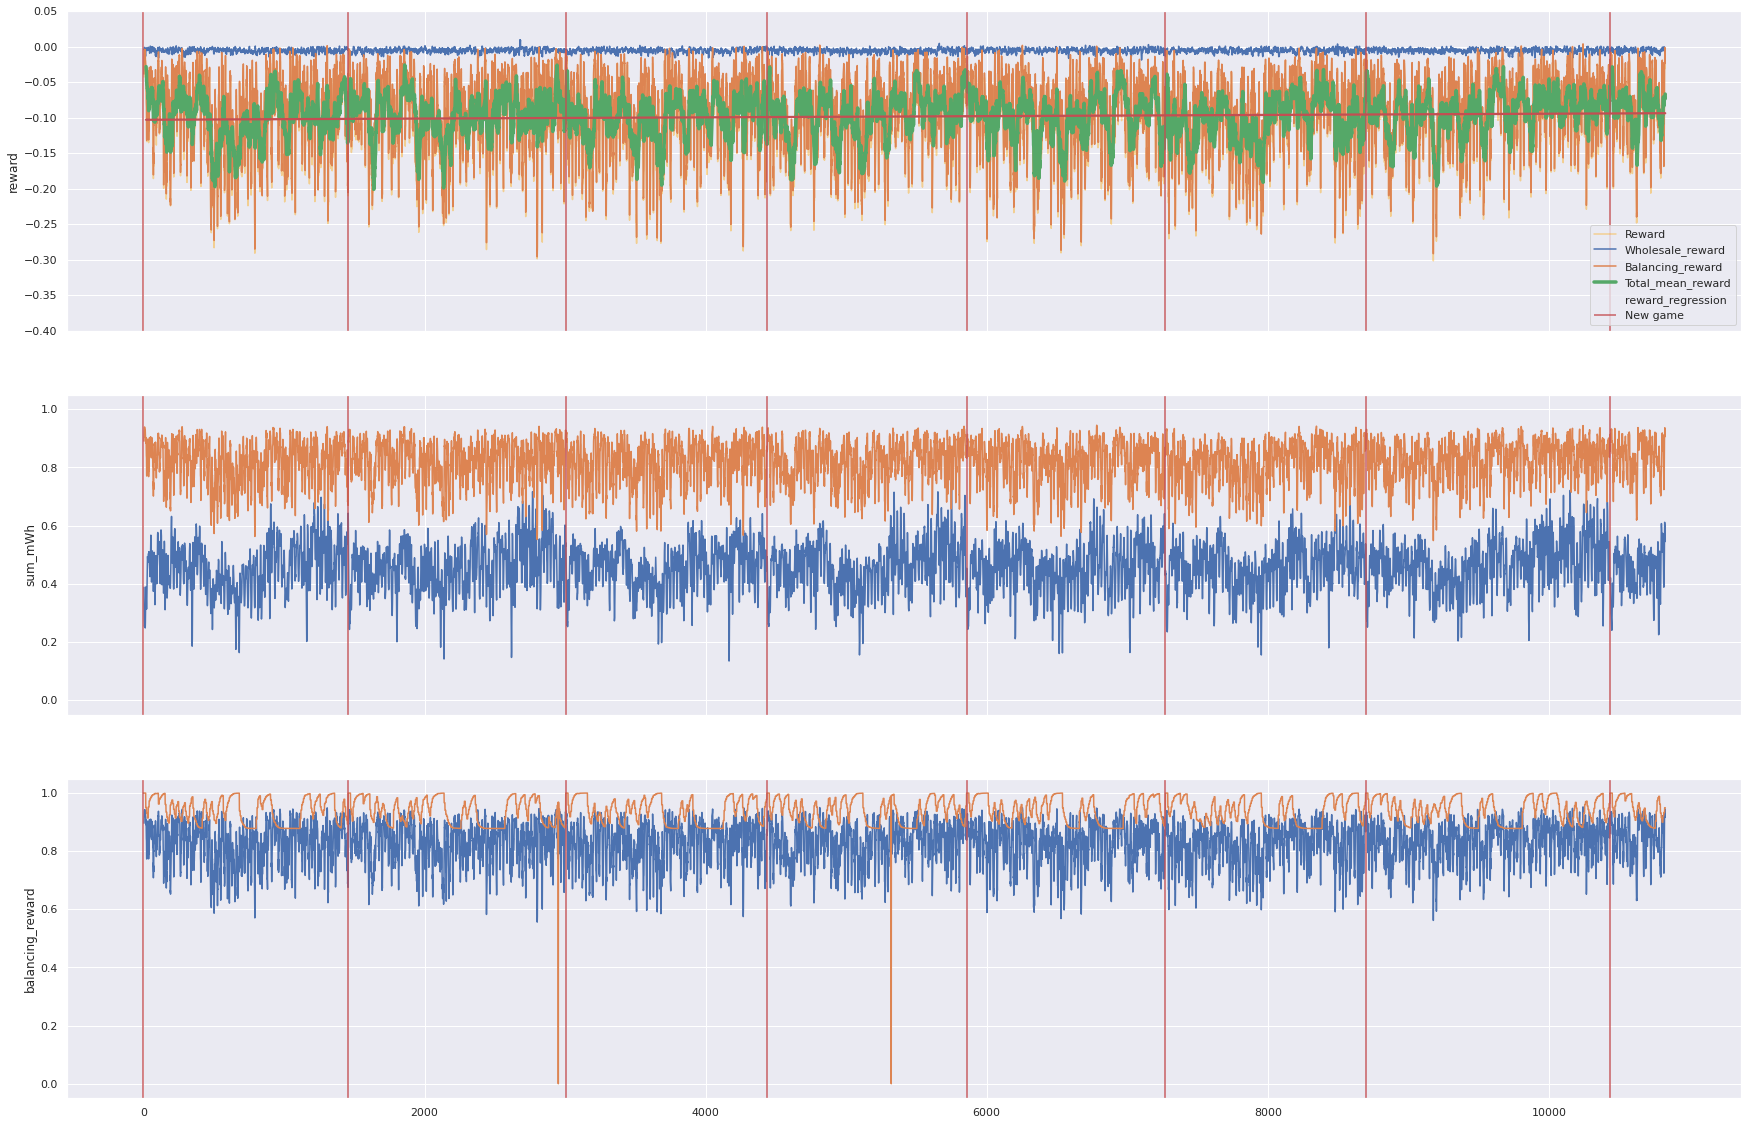

In [15]:

sns.set_theme()
sns.axes_style("darkgrid")
f, axs = plt.subplots(3, 1, sharex=True)



#graph5 = sns.lineplot(x=df_tariff_reward.index, y=df_tariff_reward, ax=axs, label="Tariff_reward")
#graph6 = sns.lineplot(x=df_shaped.index, y=df_shaped, ax=axs, label="Shaped_reward", color="green")

graph7 = sns.lineplot(x=df_reward.index, y=df_reward["reward"].rolling(5).mean(), color="orange", ax=axs[0], alpha=0.4, label="Reward")
graph4 = sns.lineplot(x=df_wholesale_reward.index, y=df_wholesale_reward, ax=axs[0],label="Wholesale_reward")
graph3 = sns.lineplot(x=df_balancing_reward.index, y=df_balancing_reward, ax=axs[0], label="Balancing_reward")
graph2 = sns.lineplot(x=df_reward_rolling.index, y=df_reward_rolling, ax=axs[0], label="Total_mean_reward", linewidth= 3.5)
graph8 = sns.regplot(x=df_reward_rolling.index, y=df_reward_rolling, marker="", label="reward_regression", ax=axs[0])
graph9 = sns.lineplot(x=df.index, y=min_max_scaler(df["sum_mWh"]).rolling(5).mean(), data=df, ax=axs[1])
graph9 = sns.lineplot(x=df.index, y=min_max_scaler(df["reward"]).rolling(5).mean(), data=df, ax=axs[1])
sns.lineplot(x=df.index, y=min_max_scaler(df["balancing_reward"]).rolling(5).mean(), data=df, ax=axs[2])
sns.lineplot(x=df.index, y=min_max_scaler(df["customer_count"]), data=df, ax=axs[2])


for ax in axs:
    ax.vlines(
            df[df["gameId"].shift() != df["gameId"]].index,
            0,
            1,
            transform=ax.get_xaxis_transform(),
            colors="r",
            alpha=0.9,
            label="New game",
        )
axs[0].legend()
axs[1].set_ylabel("sum_mWh")
axs[0].set_ybound(-0.4,0.05)
f.set_figwidth(30)
f.set_figheight(20)


In [16]:
df.iloc[df.index < 2365]["cleared_orders_energy_23"].max()

49.785621643066406

In [17]:
df["timeslot"]

0       362
1       363
2       364
3       365
4       366
       ... 
688    1050
689    1051
690    1052
691    1053
692    1054
Name: timeslot, Length: 693, dtype: int64

In [19]:
# Or just use shift?
index_slot = 200
col_names_temp = ["reward", "customer_count"]
templist = []
for i in range(24):
    energy_price_bid = df.iloc[(index_slot - i) -2][[f"energy_{i+1}",f"price_{i+1}"]].values
    trade_result = df.iloc[index_slot - i ][[f"cleared_orders_energy_{i}", f"cleared_orders_price_{i}"]].values
    market_position = df.iloc[index_slot -i][f"market_position_{i}"]
    sum_mwh = df.iloc[index_slot ]["sum_mWh"]
    index_slot_list = df.iloc[index_slot-i].name
    predicted_prosumption=df.iloc[index_slot-i][f"p_customer_prosumption_{i}"]/1000
    #if i = 0:
    #    trade_result[0] = df.iloc[timeslot]["final"]
    templist.append([*energy_price_bid, *trade_result, market_position, sum_mwh, index_slot_list, predicted_prosumption])

df_action_analysis = pd.DataFrame(templist, columns=["energy_action", "price_action", "energy_trade_order", "price_trade_order", "market_position", "sum_mWh", "index_slot", "predicted_prosumption"])
df_action_analysis

,energy_action,price_action,energy_trade_order,price_trade_order,market_position,sum_mWh,index_slot,predicted_prosumption
0,43.868399,-24.059004,0.000000,0.000000,173.068136,64.818296,200,-10.676852
1,19.785917,-54.233378,0.000000,0.000000,173.068136,64.818296,199,-9.982215
2,-21.457011,86.270726,0.000000,0.000000,173.068136,64.818296,198,-12.297743
3,-39.291921,96.743655,0.000000,0.000000,173.068136,64.818296,197,-10.570010
4,-19.113496,28.350478,-1.075645,34.020575,173.068136,64.818296,196,-11.005514
5,-1.388732,0.828198,-0.753851,0.869607,174.143781,64.818296,195,-12.672712
6,-18.048483,25.783852,-0.404792,30.940622,175.532512,64.818296,194,-11.346806
7,46.719927,-91.901571,17.769352,-77.029422,175.937304,64.818296,193,-10.384981
8,-47.508770,0.961053,-31.712600,1.009106,129.217379,64.818296,192,-5.919697
9,32.513362,-80.278206,10.480207,-59.808131,169.000520,64.818296,191,-5.926120


In [20]:
df_action_analysis.style.background_gradient(cmap="bwr")

,energy_action,price_action,energy_trade_order,price_trade_order,market_position,sum_mWh,index_slot,predicted_prosumption
0,43.868399,-24.059004,0.000000,0.000000,173.068136,64.818296,200,-10.676852
1,19.785917,-54.233378,0.000000,0.000000,173.068136,64.818296,199,-9.982215
2,-21.457011,86.270726,0.000000,0.000000,173.068136,64.818296,198,-12.297743
3,-39.291921,96.743655,0.000000,0.000000,173.068136,64.818296,197,-10.570010
4,-19.113496,28.350478,-1.075645,34.020575,173.068136,64.818296,196,-11.005514
5,-1.388732,0.828198,-0.753851,0.869607,174.143781,64.818296,195,-12.672712
6,-18.048483,25.783852,-0.404792,30.940622,175.532512,64.818296,194,-11.346806
7,46.719927,-91.901571,17.769352,-77.029422,175.937304,64.818296,193,-10.384981
8,-47.508770,0.961053,-31.712600,1.009106,129.217379,64.818296,192,-5.919697
9,32.513362,-80.278206,10.480207,-59.808131,169.000520,64.818296,191,-5.926120


In [48]:
templist[23]

[13.250768184661865,
 -11.666223406791687,
 0.0,
 0.0,
 0.0,
 17.870421495795096,
 2337,
 -3.41269091796875]

In [39]:
a = df.iloc[df.index <2361][[x for x in df.columns if (x.startswith("energy_") | (x.startswith("price_")))]]
a.iloc[a.index > 2333].T

,2334,2335,2336,2337,2338,2339,2340,2341,2342,2343,...,2351,2352,2353,2354,2355,2356,2357,2358,2359,2360
energy_1,-14.880037,31.129611,42.967099,-41.775432,-37.905017,45.981115,45.113790,17.218274,-20.982802,-46.727052,...,-40.626779,-31.305185,44.420290,-2.951354,48.354191,13.402098,-27.405137,9.983933,19.391143,47.281051
price_1,4.820567,-74.313867,-50.030589,11.660483,16.407698,-99.006212,-9.298638,-85.563219,9.730065,96.208990,...,2.607027,7.493910,-41.263598,25.623110,-34.626263,-94.931757,9.814397,-56.368852,-81.234211,-84.694552
energy_2,-48.912114,-42.834648,-26.158053,40.746772,-40.926513,29.990810,30.969828,-30.593559,26.691806,34.691483,...,48.971587,47.370422,34.419739,-26.646039,43.716145,-2.923882,-17.936969,-39.478016,29.618585,31.299102
price_2,9.143999,76.768345,56.942749,-53.617907,46.603286,-81.913149,-20.484918,38.547018,-20.947346,-40.240797,...,-40.117615,-18.377265,-5.733690,25.737181,-10.375041,52.314651,93.760324,26.591176,-95.292366,-45.477465
energy_3,-49.729171,-22.896540,-41.717291,-38.955030,43.935978,-45.103610,-42.865035,-32.469162,33.677536,8.298099,...,-32.307625,42.786288,-44.291505,-31.415892,4.011488,18.857348,13.018572,-45.662463,42.182016,41.266036
price_3,67.070985,95.720792,48.303801,20.196927,-6.559280,20.822614,93.966532,12.981847,-83.409214,-3.792614,...,38.621795,-54.053748,75.292361,89.289546,-55.891639,-30.849642,-19.664583,84.983087,-5.143490,-78.476655
energy_4,14.090621,45.951021,-9.587699,34.400642,-42.447403,-47.248638,0.371498,46.130300,-36.994925,-32.048771,...,15.093136,-11.206090,6.797266,37.835193,16.233099,-22.890487,-47.900173,-28.235939,-10.508728,38.690484
price_4,-8.574772,-67.856658,45.657247,-54.030043,80.567533,4.157391,-88.220513,-96.702474,96.186030,42.278522,...,-30.911517,76.598835,-99.771327,-17.715874,-47.111112,30.873603,78.401142,40.017092,71.374738,-72.264838
energy_5,-13.452458,-48.905349,42.835367,-35.284078,-8.905286,27.879047,42.908061,-36.625847,32.678759,-30.671725,...,6.169689,-35.610181,20.556140,-38.754588,-41.060373,-46.026394,-5.414194,-36.541992,13.146317,23.741865
price_5,92.855865,13.631722,-23.199043,93.485641,35.807139,-8.821627,-59.843600,36.826560,-14.783332,15.008155,...,-83.052719,92.365068,-60.774970,97.181594,4.563498,4.303446,31.425017,46.273273,-5.074531,-38.971841


In [59]:
energy_price_bid

array([13.250768184661865, -11.666223406791687], dtype=object)

In [22]:
for index, value in df[df.columns.difference(pd.Index(["gameId"]))].corr()["reward"].sort_values().iteritems():
    
    print(index, value)

market_position_2 -0.5808784002002741
p_grid_imbalance_4 -0.22204306246847075
p_grid_imbalance_7 -0.21309081634593305
p_grid_imbalance_5 -0.21076373498009565
p_grid_imbalance_6 -0.20742895222318075
p_grid_imbalance_3 -0.20472111559748551
p_grid_imbalance_8 -0.20019148275299017
total_prosumption -0.19843485814706296
p_grid_imbalance_9 -0.16721339316080033
p_grid_imbalance_2 -0.15371574434948154
hour_of_day_0 -0.1383093340133824
market_position_3 -0.12845700241027538
hour_of_day_23 -0.12729544628659376
market_position_1 -0.12263829138460955
market_position_0 -0.11974499037084355
market_position_4 -0.11897991717051686
day_of_week_5 -0.11584828139235694
hour_of_day_22 -0.11549092729840475
p_grid_imbalance_10 -0.10811185164184937
p_wind_speed_11 -0.09762485700628491
market_position_5 -0.09743509954931702
hour_of_day_1 -0.09051252066051785
p_wholesale_price_8 -0.09049156052793865
p_wind_speed_13 -0.08931783226694143
p_wind_speed_12 -0.08822363505192832
p_temperature_12 -0.08776165099118795
p

In [18]:
for x in df.columns:
    print(x)

energy_1
price_1
energy_2
price_2
energy_3
price_3
energy_4
price_4
energy_5
price_5
energy_6
price_6
energy_7
price_7
energy_8
price_8
energy_9
price_9
energy_10
price_10
energy_11
price_11
energy_12
price_12
energy_13
price_13
energy_14
price_14
energy_15
price_15
energy_16
price_16
energy_17
price_17
energy_18
price_18
energy_19
price_19
energy_20
price_20
energy_21
price_21
energy_22
price_22
energy_23
price_23
energy_24
price_24
gameId
timeslot
p_grid_imbalance_0
p_grid_imbalance_1
p_grid_imbalance_2
p_grid_imbalance_3
p_grid_imbalance_4
p_grid_imbalance_5
p_grid_imbalance_6
p_grid_imbalance_7
p_grid_imbalance_8
p_grid_imbalance_9
p_grid_imbalance_10
p_grid_imbalance_11
p_grid_imbalance_12
p_grid_imbalance_13
p_grid_imbalance_14
p_grid_imbalance_15
p_grid_imbalance_16
p_grid_imbalance_17
p_grid_imbalance_18
p_grid_imbalance_19
p_grid_imbalance_20
p_grid_imbalance_21
p_grid_imbalance_22
p_grid_imbalance_23
p_customer_prosumption_0
p_customer_prosumption_1
p_customer_prosumption_2
p

In [21]:
df2 = pd.DataFrame()
df2["predicted_consumption_mWh"] = df["p_customer_prosumption_0"] /-1000
df2["timeslot"] = df["timeslot"]
df2["market_position_0"] = df["market_position_0"]
df2["sum_mWh"] = df["sum_mWh"]
df2["error_prediction"] = abs(df2["sum_mWh"]) - df2["predicted_consumption_mWh"]
df2

,predicted_consumption_mWh,timeslot,market_position_0,sum_mWh,error_prediction
0,3.158650,362,0.000000,63.734439,60.575789
1,1.028625,363,0.000000,49.715512,48.686887
2,2.351820,364,0.000000,42.554187,40.202366
3,2.485271,365,76.689322,38.390768,35.905497
4,2.843510,366,24.239940,25.528902,22.685392
...,...,...,...,...,...
368,9.852182,730,145.985644,40.511581,30.659399
369,9.906899,731,139.532297,54.380147,44.473247
370,9.414549,732,5.773578,37.515382,28.100833
371,8.868152,733,123.108493,63.452024,54.583872


### Action analysis

In [ ]:
f,axs = plt.subplots(1,1,figsize=(25,25))
for i in range(1):
    #ax = sns.scatterplot(x=action_observation_reward_df[f"price_{i+1}"], y=action_observation_reward_df[f"energy_{i+1}"], data=action_observation_reward_df, hue="balancing_reward", ax=axs)
    ax = sns.histplot(x=action_observation_reward_df[f"price_{i+1}"], y=action_observation_reward_df[f"energy_{i+1}"], data=action_observation_reward_df, hue="balancing_reward", ax=axs)
    

In [ ]:
plot_args= {"cut": 0}
f,axs = plt.subplots(1,1,figsize=(25,25))
ax = sns.boxplot(data=df_action[energy], orient="h")

In [ ]:
f,axs = plt.subplots(1,1,figsize=(25,25))
ax = sns.boxplot(data=df_action[price],  orient="h")

In [ ]:

for i in range(0,24,1):
    print(df_action[df_action[price[i]] >=0])